In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('retail_data.csv')
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [5]:
df.info

<bound method DataFrame.info of         Transaction_ID  Customer_ID                 Name  \
0            8691788.0      37249.0  Michelle Harrington   
1            2174773.0      69749.0          Kelsey Hill   
2            6679610.0      30192.0         Scott Jensen   
3            7232460.0      62101.0        Joseph Miller   
4            4983775.0      27901.0        Debra Coleman   
...                ...          ...                  ...   
302005       4246475.0      12104.0         Meagan Ellis   
302006       1197603.0      69772.0          Mathew Beck   
302007       7743242.0      28449.0           Daniel Lee   
302008       9301950.0      45477.0       Patrick Wilson   
302009       2882826.0      53626.0       Dustin Merritt   

                           Email         Phone                       Address  \
0              Ebony39@gmail.com  1.414787e+09             3959 Amanda Burgs   
1               Mark36@gmail.com  6.852900e+09            82072 Dawn Centers   
2      

In [10]:
df.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [6]:
df.dropna(inplace=True) 

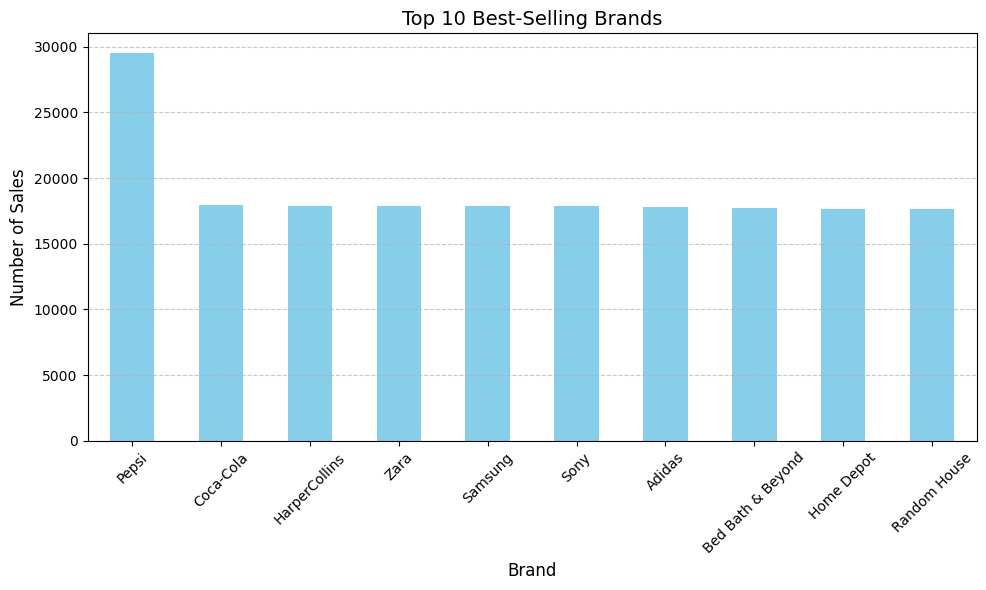

In [19]:
brand_counts = df['Product_Brand'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title("Top 10 Best-Selling Brands", fontsize=14)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Number of Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

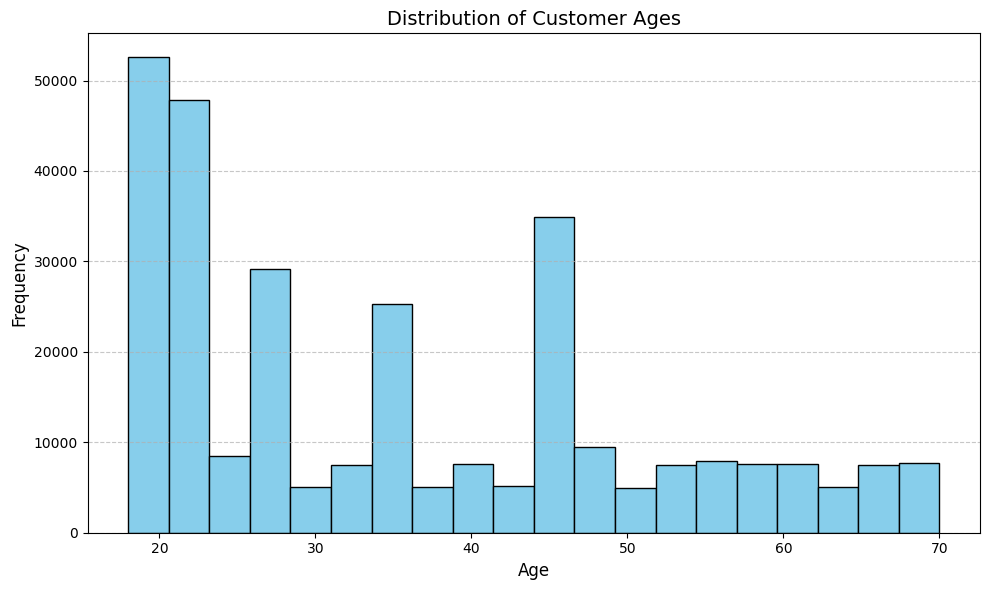

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title("Distribution of Customer Ages", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

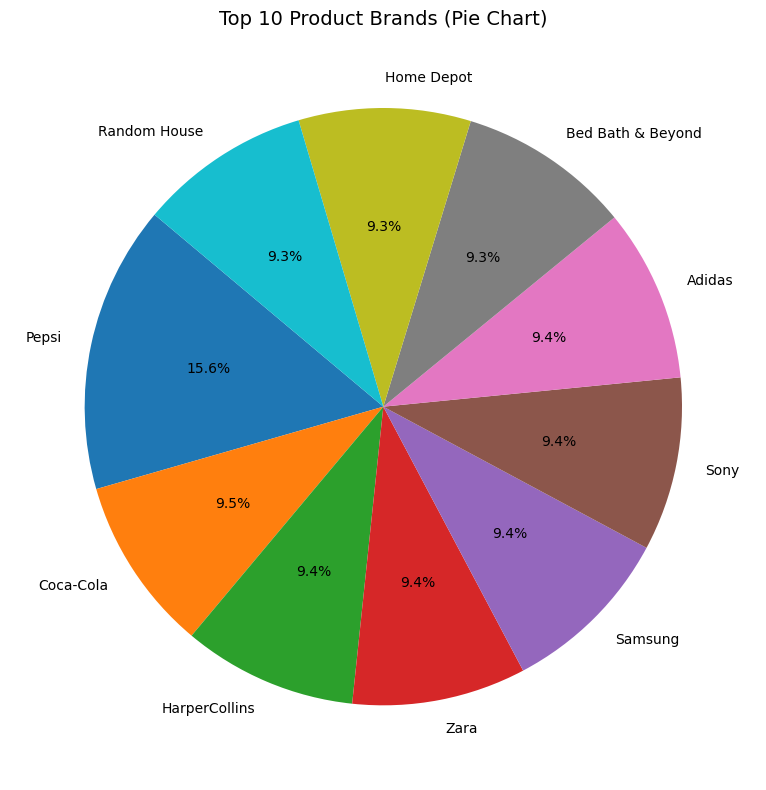

In [21]:
brand_counts = df['Product_Brand'].value_counts().head(10)

#  pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    brand_counts,
    labels=brand_counts.index,
    autopct='%1.1f%%',       
    startangle=140        
)

plt.title("Top 10 Product Brands (Pie Chart)", fontsize=14)
plt.tight_layout()

# Show the chart
plt.show()

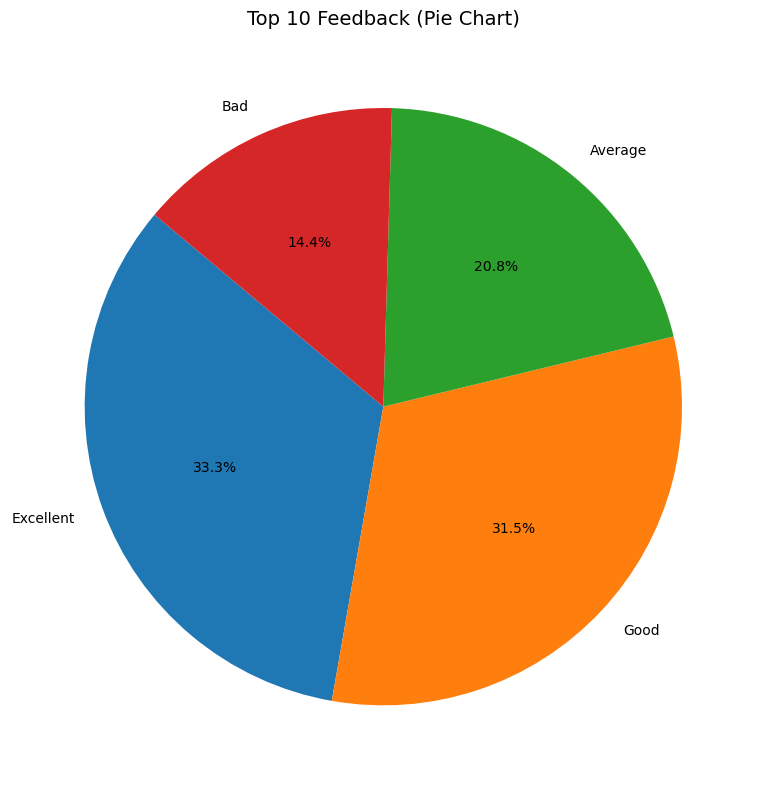

In [7]:
#pie chart
Fd = df['Feedback'].value_counts().head(10)

#  pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    Fd,
    labels=Fd.index,
    autopct='%1.1f%%',       
    startangle=140        
)

plt.title("Top 10 Feedback (Pie Chart)", fontsize=14)
plt.tight_layout()

# Show the chart
plt.show()


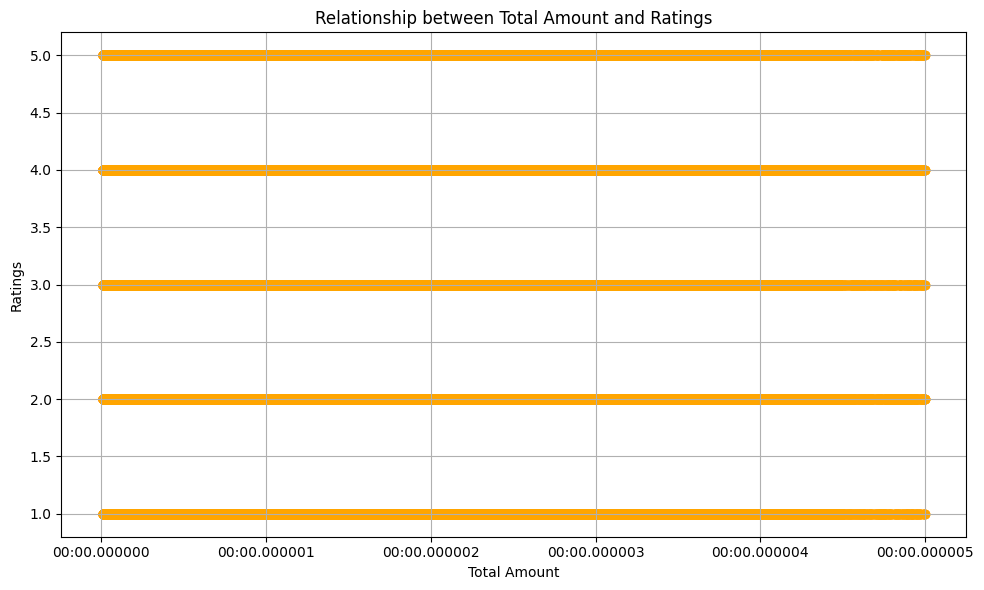

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Total_Amount'], df['Ratings'], alpha=0.6, color='orange')
plt.title('Relationship between Total Amount and Ratings')
plt.xlabel('Total Amount')
plt.ylabel('Ratings')
plt.grid(True)
plt.tight_layout()
plt.show()


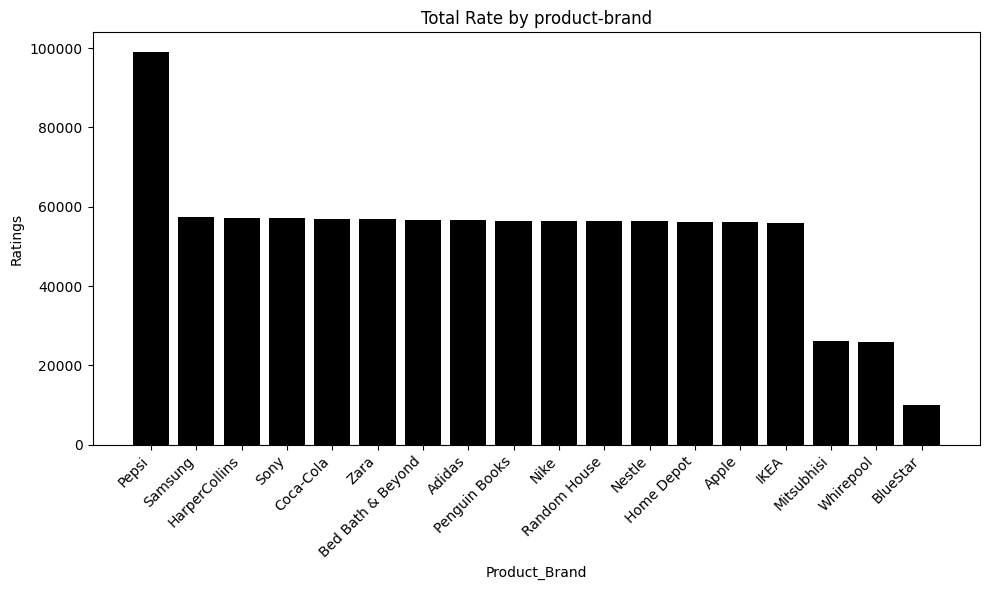

In [10]:
# Bar plot
country_revenue = df.groupby("Product_Brand")["Ratings"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(
    country_revenue.index,  
    country_revenue.values,
    color="black"        
)

# Step 3: Customize the plot appearance
plt.title("Total Rate by product-brand")  
plt.xlabel("Product_Brand")                 
plt.ylabel("Ratings")              
plt.xticks(rotation=45, ha='right')     


plt.tight_layout() 
plt.show()         # Render the plot

In [26]:
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 10))


sns.barplot(data=df, x='Country', y='product', ax=axes[0, 0], palette='Blues')
axes[0, 0].set_title('Revenue by Country')
axes[0, 0].tick_params(axis='x', rotation=45)


sns.boxplot(data=df, x='Country', y='Feadback', ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Revenue Distribution by Country')
axes[0, 1].tick_params(axis='x', rotation=45)


sns.violinplot(data=df, x='Age Group', y='Ratings', ax=axes[1, 0], palette='Paired')
axes[1, 0].set_title('Revenue by Age Group')


sns.histplot(data=df, x='Ratings', bins=30, kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Revenue Distribution')

plt.tight_layout()
plt.show()

<class 'ModuleNotFoundError'>: No module named 'seaborn'